In [1]:
import torch
import time
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device
from snn_delays.utils.test_behavior import tb_minimal

device = get_device()

# for reproducibility
torch.manual_seed(10)

'''
Remarks:
- as log-uniforms shows tighter train-tess loss gap, see what happens when more epochs are trained
'''

dataset = 'shd'
total_time = 50
batch_size = 1024


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


Without crop to, log-normal, 78%

In [2]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 38.97 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 11.71 seconds


SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=700, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=3072, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=20, bias=False)
    )
  )
)
Epoch [1/200], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 19.14507
Step [4/7], Loss: 14.60631
Step [6/7], Loss: 18.15867
Step [8/7], Loss: 15.98421
Time elasped: 3.205568313598633
2264
Test Loss: 11.176016807556152
Avg spk_count per neuron for all 50 time-steps 730.5454946996466
Test Accuracy of the model on the test samples: 4.417

max acc: 4.41696113074205
Epoch [2/200], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 11.26950
Step [4/7], Loss: 10.05949
Step [6/7], Loss: 8.72936
Step [8/7], Loss: 8.13612
Time elasped: 2.1794698238372803
2264
Test Loss: 7.531393527984619
Avg spk_count per neuron for all 50 time-steps 721.4695229681979
Test Accuracy of the model on the test samples: 7.200

max acc: 7.19964664310954
Epoch [3/200], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 7.68992
Step [4/7], Loss: 7.32013
Step [6/7], Loss: 6.94989
Step [8/7], Loss: 6.67833
Time elasped: 2.162630796432495
2264
Test Loss: 6.572811921437581
Avg spk_count per neuron for all 50 time-steps 726.7873233215548
Test Accuracy of the model 

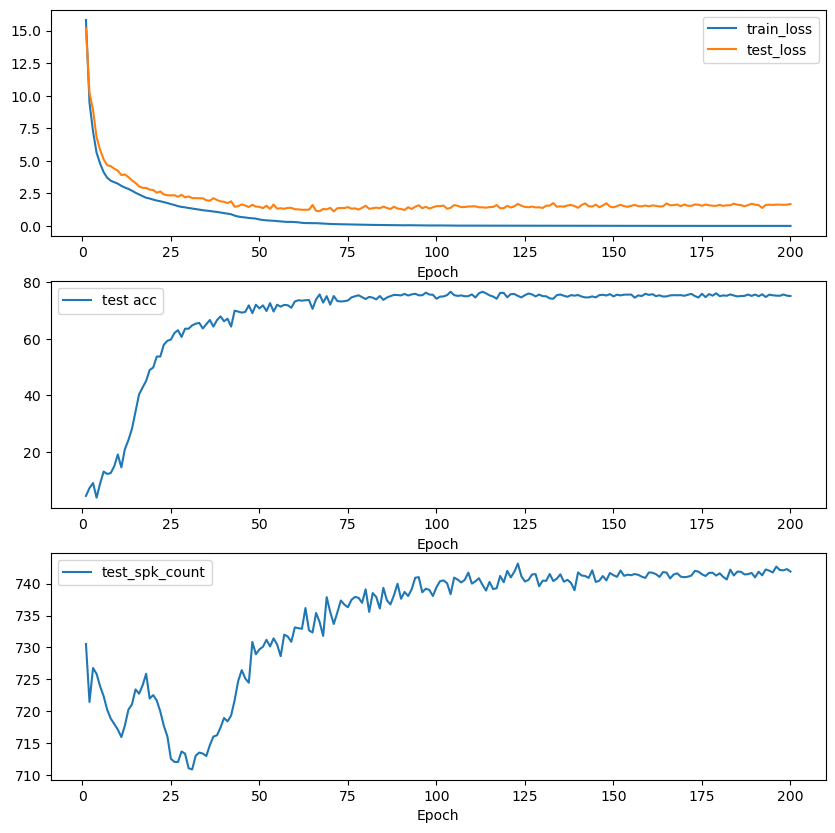

In [3]:
num_epochs = 200

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'log-uniform'
# structure = (64, 3, 'd')
# extra_kwargs = {'delay_range':(48, 16)}

structure = (64, 2, 'd')
extra_kwargs = {'delay_range':(48, 1),
                'pruned_delays': 3}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=tau_m, win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.set_layers()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_minimal, scheduler=(10, 0.95), test_every=1, freeze_taus = True)
